In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target,train_size = 0.3)

In [5]:
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(Xtrain,Ytrain)

rfc = DecisionTreeClassifier(random_state = 0)
rfc = clf.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

In [6]:
print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r))

Single Tree:0.88 Random Forest:0.88


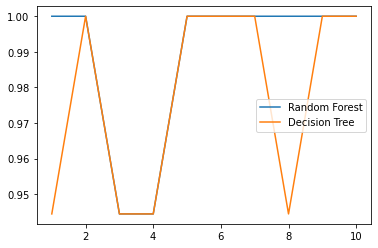

In [7]:
# cross_val_score

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators = 25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(rfc, wine.data, wine.target, cv = 10)

plt.plot(range(1,11),rfc_s,label = "Random Forest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

RandomForest:
0.9607843137254901
DecisioinTree:
0.865032679738562


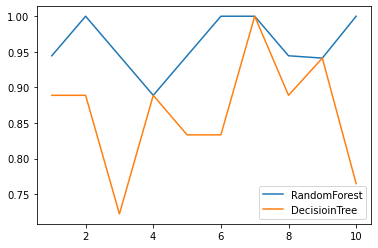

In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

label = "RandomForest"
for model in [RandomForestClassifier(n_estimators = 25),DecisionTreeClassifier()]:
    score = cross_val_score(model, wine.data, wine.target, cv = 10)
    print("{}:".format(label)),print(score.mean())
    plt.plot(range(1,11),score,label=label)
    plt.legend()
    label = "DecisioinTree"

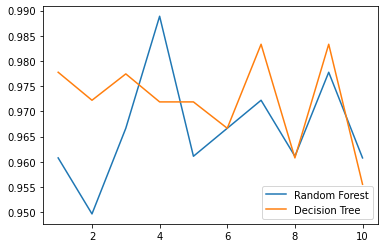

In [11]:
#multiplue times of cross validation
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators = 25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()


0.9888888888888889 14


<function matplotlib.pyplot.show(close=None, block=None)>

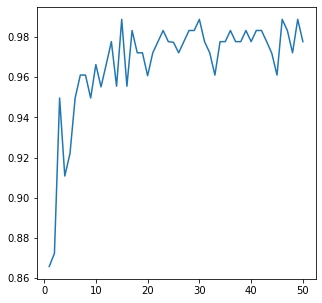

In [54]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

superpa = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs = -1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)+1))
plt.figure(figsize=[5,5])
plt.plot(range(1,51),superpa)
plt.show

0.9888888888888889 14


<function matplotlib.pyplot.show(close=None, block=None)>

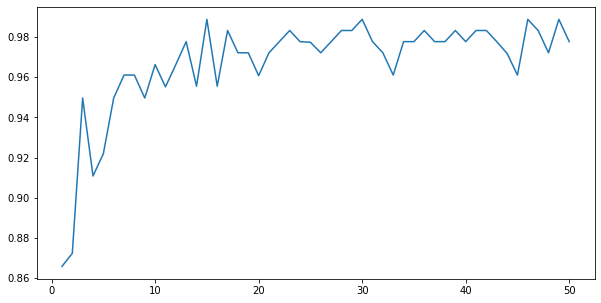

In [55]:
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[10,5])
plt.plot(range(1,51),superpa)
plt.show

In [5]:
#boostrap 不划分test & train
rfc = RandomForestClassifier(n_estimators=25,oob_score = True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9887640449438202

In [6]:
rfc.score(Xtest,Ytest)

1.0

In [9]:
rfc.feature_importances_
[*zip(wine.feature_names,rfc.feature_importances_)]

[('alcohol', 0.16029273112889048),
 ('malic_acid', 0.0420456834878902),
 ('ash', 0.010656959372432509),
 ('alcalinity_of_ash', 0.019023271134516594),
 ('magnesium', 0.033586854789522176),
 ('total_phenols', 0.01926788072811537),
 ('flavanoids', 0.10288552356283753),
 ('nonflavanoid_phenols', 0.010432269332980568),
 ('proanthocyanins', 0.021482678694735354),
 ('color_intensity', 0.14050967266429945),
 ('hue', 0.0759316391214699),
 ('od280/od315_of_diluted_wines', 0.19637837300074282),
 ('proline', 0.16750646298156707)]

In [10]:
rfc.predict_proba(Xtest)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.8 , 0.2 ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.84, 0.16, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.04, 0.96],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.12, 0.88, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.12, 0.12, 0.76],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
 